In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**given a date, displays the injected gas meter volume and its respective percentage the gas valve is open**

<class 'pandas.core.frame.DataFrame'>


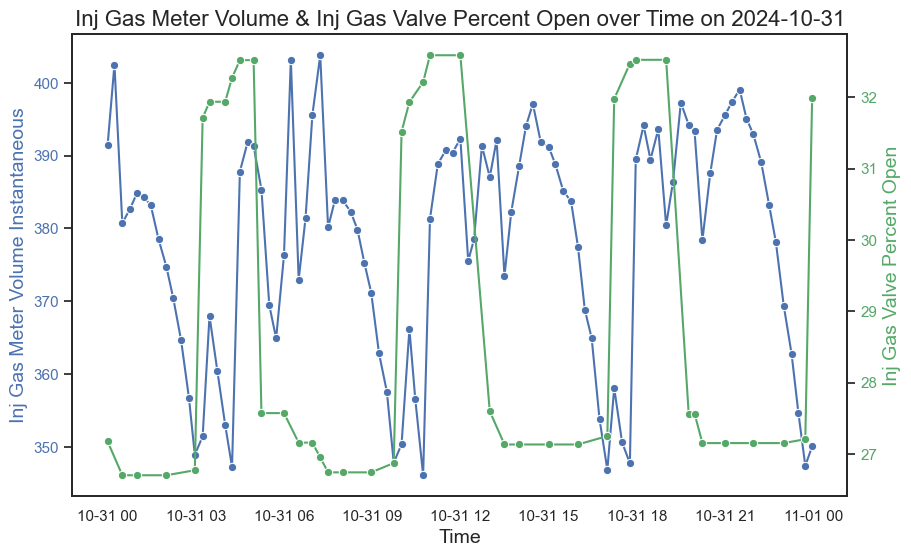

In [205]:
data = pd.read_csv('bold.csv') # reads csv file
day_input = input("YYYY-MM-DD?")
print(type(data))
# convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %I:%M:%S %p')
day = data[data['Time'].dt.date == pd.to_datetime(day_input).date()]

# fill in values for all
data['Inj Gas Valve Percent Open'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')
data['Inj Gas Meter Volume Setpoint'] = 375.0
data['Inj Gas Meter Volume Instantaneous'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')

sns.set_theme(style="white")
fig, ax1 = plt.subplots(figsize=(10, 6)) # two axises -- meter volume, percentage

# plots Inj Gas Meter Volume Instantaneous on primary y-axis
sns.lineplot(x='Time', y='Inj Gas Meter Volume Instantaneous', data=day, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Inj Gas Meter Volume Instantaneous', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# secondary y-axis for Inj Gas Valve Percent Open
ax2 = ax1.twinx()
sns.lineplot(x='Time', y='Inj Gas Valve Percent Open', data=day, marker='o', color='g', ax=ax2) # ax= ax2
ax2.set_ylabel('Inj Gas Valve Percent Open', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title(f"Inj Gas Meter Volume & Inj Gas Valve Percent Open over Time on {day_input}", fontsize=16)
#plt.xticks(rotation=45)
plt.show()


In [206]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load data
data = pd.read_csv('bold.csv')
day_input = input("YYYY-MM-DD?")

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %I:%M:%S %p')
day = data[data['Time'].dt.date == pd.to_datetime(day_input).date()]

# Interpolate missing values and set constant
data['Inj Gas Valve Percent Open'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')
data['Inj Gas Meter Volume Setpoint'] = 375.0
data['Inj Gas Meter Volume Instantaneous'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')

# Create a plotly figure
fig = go.Figure()

# Add Inj Gas Meter Volume Instantaneous
fig.add_trace(go.Scatter(
    x=day['Time'], 
    y=day['Inj Gas Meter Volume Instantaneous'], 
    mode='markers+lines',
    name='Inj Gas Meter Volume Instantaneous',
    marker=dict(color='blue'),
    line=dict(color='blue', width=2),
    opacity=0.8,  # Set initial opacity
    hoverinfo='x+y'
))

# Add Inj Gas Valve Percent Open
fig.add_trace(go.Scatter(
    x=day['Time'], 
    y=day['Inj Gas Valve Percent Open'], 
    mode='markers+lines',
    name='Inj Gas Valve Percent Open',
    marker=dict(color='green'),
    line=dict(color='green', width=2),
    opacity=0.4,  # Set initial opacity for differentiation
    hoverinfo='x+y'
))

# Update layout to make the plot interactive and styled
fig.update_layout(
    title=f"Inj Gas Meter Volume & Inj Gas Valve Percent Open over Time on {day_input}",
    xaxis_title="Time",
    yaxis_title="Value",
    legend_title="Legend",
    hovermode="x unified",
    template="plotly_white"
)

# Interactive color change based on conditions
# Example condition: Highlight a point when `Inj Gas Valve Percent Open` > 50%
fig.update_traces(marker=dict(
    color=['red' if value > 50 else 'blue' for value in day['Inj Gas Valve Percent Open']],
    size=8  # adjust marker size as needed
))

# Show interactive plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**comparing error**
hypothesis: when the setpoint value is exceeded more than 20, and the percentage the gas valve is open is lower than 28%, hydrate will form.

***predictions?!***

In [ ]:
# time to datetime
data['Time'] = pd.to_datetime(data['Time'])

# interpolation for missing percentage values
data['Inj Gas Valve Percent Open'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')
data['Inj Gas Meter Volume Instantaneous'] = data['Inj Gas Meter Volume Instantaneous'].interpolate(method='linear')
# filling setpoint values with constant value of 375
data['Inj Gas Meter Volume Setpoint'] = 375.0

# error between the instantaneous gas meter volumes and setpoint
data['Error'] = data['Inj Gas Meter Volume Instantaneous'] - data['Inj Gas Meter Volume Setpoint']
data.head()

# sample thresholds to determine hydrate formation
high_volume_threshold = data['Inj Gas Meter Volume Instantaneous'].quantile(0.75)  # top 25% as "high volume"
low_percent_threshold = data['Inj Gas Valve Percent Open'].quantile(0.25)  # bottom 25% as "low percent"
high_error_threshold = data['Error'].quantile(0.75)  # top 25% as "high error"

# 'Hydrate_Formed' based on these conditions
data['Hydrate_Formed'] = (
    (data['Inj Gas Meter Volume Instantaneous'] > high_volume_threshold) &
    (data['Inj Gas Valve Percent Open'] < low_percent_threshold) &
    (data['Error'] > high_error_threshold)
)
data['Hydrate_Formed'] = data['Hydrate_Formed'].astype(int)
# data.head(50)


In [ ]:
X = data[['Inj Gas Valve Percent Open', 'Error', 'Inj Gas Meter Volume Instantaneous']]
y = data['Hydrate_Formed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print(X_train, y_train)
model.predict(X_test)

# print(classification_report(y_test, y_pred))

     Inj Gas Valve Percent Open     Error  Inj Gas Meter Volume Instantaneous
430                    32.67054  -7.73175                           367.26825
249                    27.03376 -29.39175                           345.60825
220                    32.41834 -24.58770                           350.41230
18                     32.52163  12.82695                           387.82695
244                    26.81901  -6.00015                           368.99985
..                          ...       ...                                 ...
71                     32.47241 -27.26070                           347.73930
106                    27.44286   7.07295                           382.07295
270                    27.45996   9.57390                           384.57390
435                    34.06752  -8.61315                           366.38685
102                    32.29950 -26.38980                           348.61020

[541 rows x 3 columns] 430    0
249    0
220    0
18     0
244 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       129
           1       0.80      0.57      0.67         7

    accuracy                           0.97       136
   macro avg       0.89      0.78      0.83       136
weighted avg       0.97      0.97      0.97       136



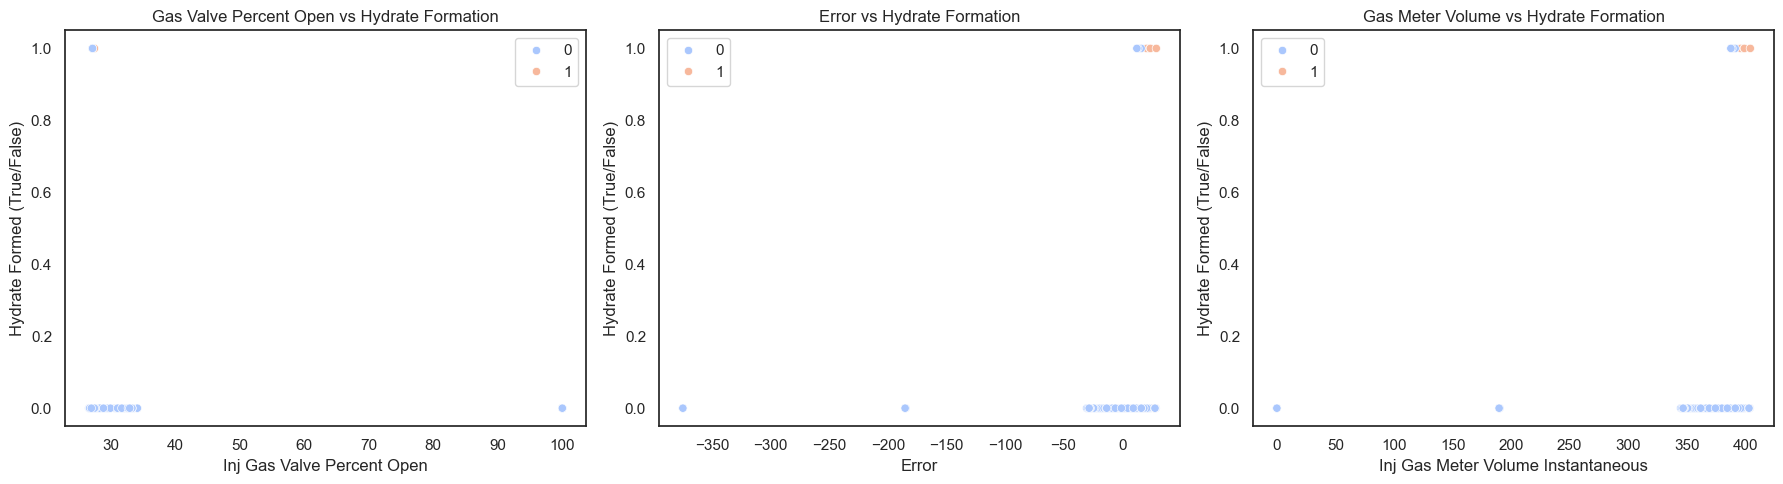

In [207]:

y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Create a figure with multiple subplots (one for each feature)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust size as needed

# Scatter plot for 'Inj Gas Valve Percent Open'
sns.scatterplot(data=X_test, x='Inj Gas Valve Percent Open', y=y_test, hue=y_pred, palette='coolwarm', ax=axes[0])
axes[0].set_title('Gas Valve Percent Open vs Hydrate Formation')
axes[0].set_xlabel('Inj Gas Valve Percent Open')
axes[0].set_ylabel('Hydrate Formed (True/False)')

# Scatter plot for 'Error'
sns.scatterplot(data=X_test, x='Error', y=y_test, hue=y_pred, palette='coolwarm', ax=axes[1])
axes[1].set_title('Error vs Hydrate Formation')
axes[1].set_xlabel('Error')
axes[1].set_ylabel('Hydrate Formed (True/False)')

# Scatter plot for 'Inj Gas Meter Volume Instantaneous'
sns.scatterplot(data=X_test, x='Inj Gas Meter Volume Instantaneous', y=y_test, hue=y_pred, palette='coolwarm', ax=axes[2])
axes[2].set_title('Gas Meter Volume vs Hydrate Formation')
axes[2].set_xlabel('Inj Gas Meter Volume Instantaneous')
axes[2].set_ylabel('Hydrate Formed (True/False)')

# Show the plots
plt.tight_layout()
plt.show()
